# Last.fm
Navigate **rodrigodub** scrobbling history

2020.08.14

CSV file generated by [Last.fm to csv](https://benjaminbenben.com/lastfm-to-csv/) ([GitHub](https://github.com/benfoxall/lastfm-to-csv))

In [9]:
%matplotlib inline

In [105]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import datetime

## Define Functions

In [151]:
def loaddata(filename):
    df = pd.read_csv(filename, header=None, names=['rawartist', 'album', 'track', 'date'])
    df['date'] = df['date'].apply(lambda x:datetime.datetime.strptime(x, '%d %b %Y %H:%M'))
    return df

In [55]:
def summarisecolumn(dataframe, columnname, threshold):
    """Counts unique values of 'columnname', converts Pandas Series to Dataframe,
       and returns only values greater than threshold."""
    df = dataframe[columnname].value_counts()
    df = df.to_frame()
    df = df.reset_index()
    df.columns = ['value', 'count']
    df = df[df['count'] >= threshold]
    return df

In [89]:
def drawbarchart(dataframe, title):
    """Draw bar chart"""
    # Make a fake dataset:
    height = dataframe['count']
    bars = dataframe['value']
    y_pos = np.arange(len(bars))

    # Create bars
    plt.bar(y_pos, height)

    # Create names on the x-axis
    plt.xticks(y_pos, bars, rotation=90)
    
    # Make figure wider
    #plt.figure(figsize=(12,5))
    #plt.figure(figsize=(800/mydpi, 600/mydpi), dpi=mydpi)
    
    # Titles
    plt.title(title)
    #plt.xlabel('categories')
    plt.ylabel('Play count')

    # Show graphic
    plt.show()

In [159]:
def daterange(dataframe, fromdate, todate):
    """fromdate and todate in the form of YYYYMMDD"""
    df = dataframe
    fd = datetime.datetime.strptime(str(fromdate), '%Y%m%d')
    td = datetime.datetime.strptime(str(todate), '%Y%m%d')
    df = df[df['date'] >= fd]
    df = df[df['date'] < td]
    return df

## Load dataset

In [152]:
rawdata = loaddata('rodrigodub 20200814.csv')

In [153]:
rawdata

,rawartist,album,track,date
0,MF DOOM,MM...FOOD,Hoe Cakes,2020-08-13 10:33:00
1,MF DOOM,Special Herbs + Spices Volume One,Outro - Fat Man Scoop,2020-08-13 10:32:00
2,MF DOOM,Metal Fingers Presents: Special Herbs The Box ...,Eucalyptus,2020-08-13 10:30:00
3,MF DOOM,Born Like This,Thank Ya,2020-08-13 10:29:00
4,MF DOOM,Metal Fingers Presents: Special Herbs The Box ...,Burdock Root,2020-08-13 10:27:00
...,...,...,...,...
114211,Ben Harper,Burn To Shine,Suzie Blue,2006-05-30 17:37:00
114212,Mombojó,NaN,Cabidela,2006-05-30 17:33:00
114213,Lucas Santtana e Seleção Natural,NaN,Awô dub,2006-05-30 17:25:00
114214,Gnarls Barkley,St. Elsewhere,St. Elsewhere,2006-05-30 17:16:00


In [154]:
rawdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114216 entries, 0 to 114215
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   rawartist  114216 non-null  object        
 1   album      102900 non-null  object        
 2   track      114216 non-null  object        
 3   date       114216 non-null  datetime64[ns]
dtypes: datetime64[ns](1), object(3)
memory usage: 3.5+ MB


## Top Artists Overall

In [81]:
topartists = summarisecolumn(rawdata, 'rawartist', 600)
topartists

,value,count
0,Céu,1564
1,Flying Lotus,1445
2,Curumin,1322
3,The Budos Band,1184
4,Radiohead,1140
5,Beastie Boys,1047
6,The Beatles,1047
7,Sonic Youth,943
8,Thievery Corporation,940
9,Bob Dylan,897


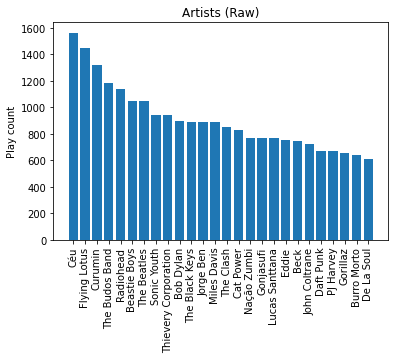

In [93]:
drawbarchart(topartists, 'Artists (Raw)')

## Filter by date range

In [168]:
s2020 = daterange(rawdata, 20200101, 20210101)
top2020 = summarisecolumn(s2020, 'rawartist', 4)
top2020

,value,count
0,MF DOOM,60
1,Fontaines D.C.,50
2,Flying Lotus,48
3,Madvillain,43
4,Erykah Badu,38
5,Thundercat,26
6,King Krule,25
7,Angel Olsen,24
8,BADBADNOTGOOD,21
9,Freddie Gibbs,15


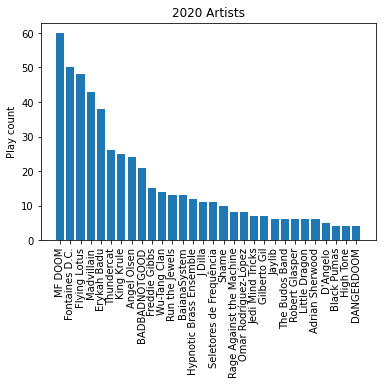

In [169]:
drawbarchart(top2020, '2020 Artists')

## References
- [CSV without header](https://stackoverflow.com/questions/28382735/python-pandas-does-not-read-the-first-row-of-csv-file)
- [value_counts()](https://stackoverflow.com/questions/45759966/counting-unique-values-in-a-column-in-pandas-dataframe-like-in-qlik/45760042)
- [Series to Dataframe](https://stackoverflow.com/questions/26097916/convert-pandas-series-to-dataframe)
- [Index to Column](https://stackoverflow.com/questions/20461165/how-to-convert-index-of-a-pandas-dataframe-into-a-column) (reset_index() solved it)
- [Renaming dataframe columns](https://stackoverflow.com/questions/11346283/renaming-columns-in-pandas)
- Draw Bar Chart [[1]](https://pythonspot.com/matplotlib-bar-chart/), [[2]](https://python-graph-gallery.com/1-basic-barplot/), [[3]](https://python-graph-gallery.com/7-custom-barplot-layout/), [[4]](https://python-graph-gallery.com/4-add-title-and-axis-label/)